In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
from sklearn.model_selection import ParameterGrid




from darts.timeseries import TimeSeries
from darts.utils.timeseries_generation import datetime_attribute_timeseries 
from darts.dataprocessing.transformers import Scaler 
from darts.models import RNNModel

In [5]:
# Loading the Data and Setting the Index
df = pd.read_csv(r"C:\Users\siddharth\Desktop\Python-Time-Series-Forecasting\Python - Time Series Forecasting\Deep Learning for Time Series Forecasting\LSTM\nyc_data.csv", index_col = "Date", parse_dates = True)
df.head()

,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305
2015-01-02,581.276773,0,0,0,4.73,131.574
2015-01-03,754.117039,0,0,0,7.23,162.700
2015-01-04,622.252774,0,0,0,10.96,160.281
2015-01-05,785.373319,0,0,0,6.92,51.077


In [6]:
df = df.asfreq('D')

In [7]:
df = df.rename(columns={'Demand':'y'})

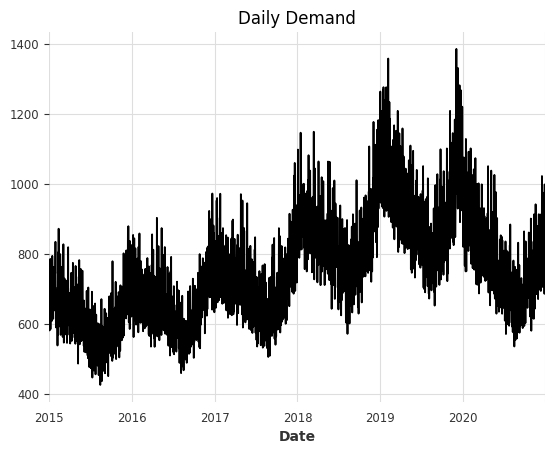

In [8]:
# Plot the daily demand
df['y'].plot(title = 'Daily Demand')
plt.show()

In [9]:
df

,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305
2015-01-02,581.276773,0,0,0,4.73,131.574
2015-01-03,754.117039,0,0,0,7.23,162.700
2015-01-04,622.252774,0,0,0,10.96,160.281
2015-01-05,785.373319,0,0,0,6.92,51.077
...,...,...,...,...,...,...
2020-12-27,685.915026,0,0,0,2.89,38.674
2020-12-28,998.051170,0,0,0,8.83,166.712
2020-12-29,847.123399,0,0,0,3.48,161.865


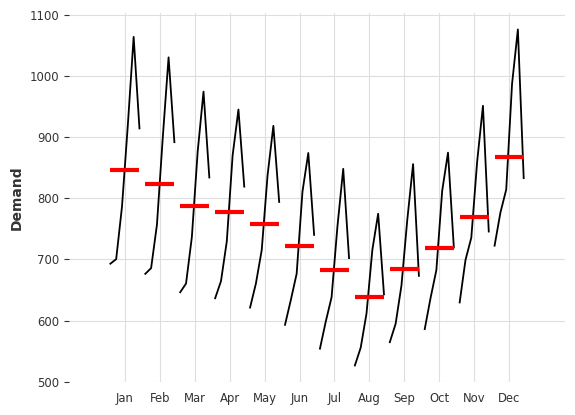

In [10]:
month_plot(df['y'].resample('ME').mean(), ylabel='Demand') 
plt.show()

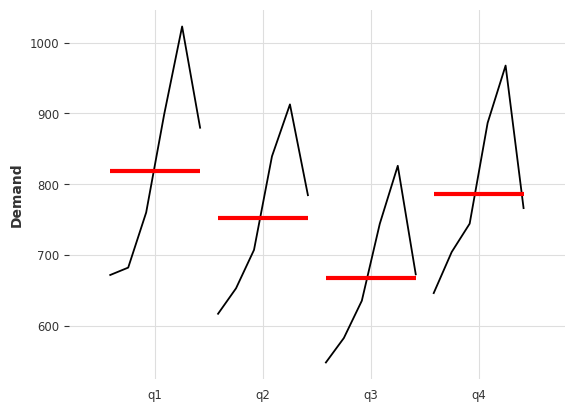

In [11]:
# Plot the quarterly seasonality of the target variable by resampling the data to quarterly frequency and calculating the mean
quarter_plot(df['y'].resample('QE').mean(),
           ylabel = 'Demand')
plt.show()

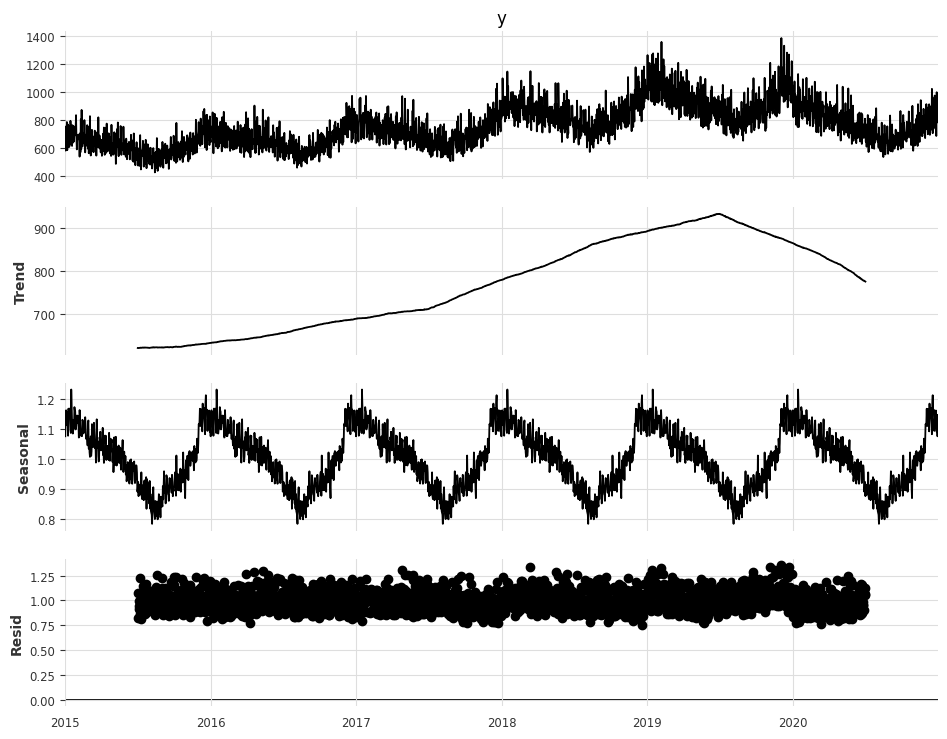

In [12]:
# Perform seasonal decomposition of the daily demand data using an additive model
decomposition = seasonal_decompose(df['y'],
                                   model = 'mul',
                                   period = 365)

# Plot the decomposed components (trend, seasonal, and residual)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

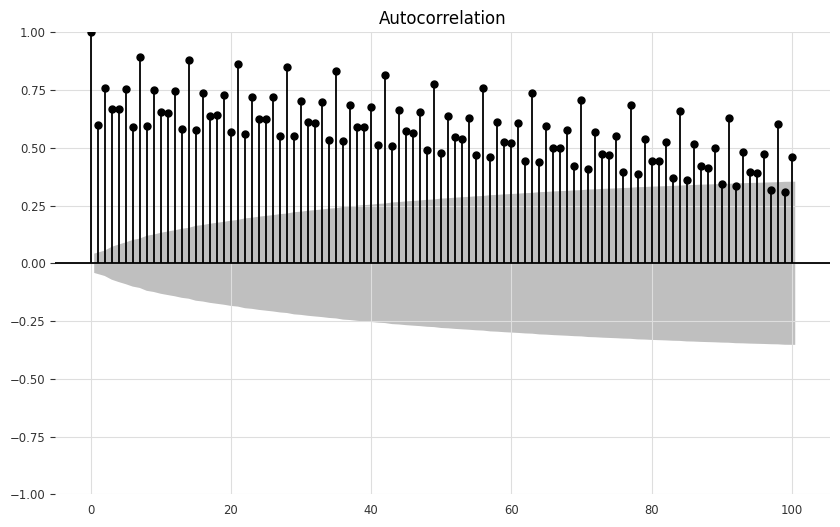

In [13]:
# Plot the autocorrelation function (ACF) for the time series data
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df['y'], lags = 100, ax = ax) # Generate the ACF plot with 100 lags
plt.show()

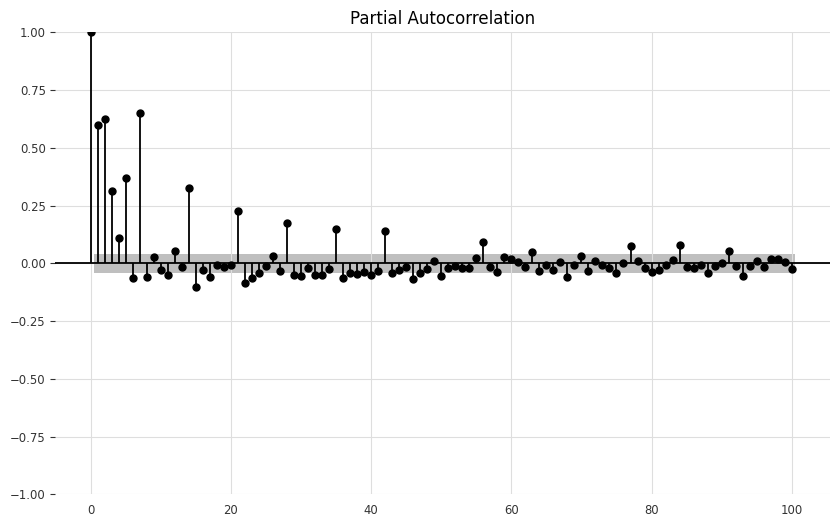

In [14]:
# Plot the partial autocorrelation function (PACF) for the time series data
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df['y'], lags = 100, ax = ax)  # Generate the PACF plot with 100 lags
plt.show()

In [19]:
## Prepare the time series objects 
series = TimeSeries.from_series(df['y'])

covariates = TimeSeries.from_dataframe(df.iloc[:,1:])


In [21]:
covariates

<TimeSeries (DataArray) (Date: 2192, component: 5, sample: 1)> Size: 88kB
array([[[  0.   ],
        [  0.   ],
        [  0.   ],
        [  3.68 ],
        [ 41.305]],

       [[  0.   ],
        [  0.   ],
        [  0.   ],
        [  4.73 ],
        [131.574]],

       [[  0.   ],
        [  0.   ],
        [  0.   ],
        [  7.23 ],
        [162.7  ]],

       ...,

       [[  0.   ],
        [  0.   ],
        [  0.   ],
        [  3.48 ],
        [161.865]],

       [[  0.   ],
        [  0.   ],
        [  0.   ],
        [  5.97 ],
        [179.634]],

       [[  0.   ],
        [  0.   ],
        [  0.   ],
        [  8.22 ],
        [149.221]]])
Coordinates:
  * Date       (Date) datetime64[ns] 18kB 2015-01-01 2015-01-02 ... 2020-12-31
  * component  (component) <U12 240B 'Easter' 'Thanksgiving' ... 'Marketing'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None